# **Data Analaysis using PySpark**

### Mount the google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 :
Installing pyspark module

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=3139d583fae2f04f1a13c61cbd2a0e5243e6d39cfebac5dfcb7f5967b3262b15
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Importing the modules

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

Creating spark session

In [4]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [5]:
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', 'true').option('header', 'true').load(listening_csv_path)
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's check the data:

In [6]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

# Data Cleaning

In [7]:
listening_df = listening_df.drop('date')

drop the null rows:

In [8]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [9]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [10]:
listening_df.printSchema()


root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [11]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**


Select two columns: track and artist

In [12]:
q0 = listening_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Find all of the records of those users who have listened to ***Adele***

In [14]:
q1 = listening_df.filter(listening_df.artist == 'Adele')
q1.show()

+-----------+--------------------+------+--------------------+
|    user_id|               track|artist|               album|
+-----------+--------------------+------+--------------------+
|  00fieldsy|Make You Feel My ...| Adele|                  19|
|  00fieldsy|        One and Only| Adele|                  21|
|00williamsl|Adele - Don't You...| Adele|                  21|
| 01higginsr|  Don't You Remember| Adele|                  21|
| 01higginsr|      Turning Tables| Adele|                  21|
| 01higginsr|Adele - Rumour Ha...| Adele|                  21|
| 01higginsr|  Don't You Remember| Adele|                  21|
| 01higginsr|         Take It All| Adele|                  21|
| 0xenolith0|Make You Feel My ...| Adele|                  19|
| 0xenolith0|               Hello| Adele|               Hello|
| 0xenolith0|               Hello| Adele|               Hello|
| 0xenolith0|    Someone Like You| Adele|                  21|
| 0xenolith0| Rolling in the Deep| Adele|              

**Query #2:**

Find top 20 users who are fan of ***Adele***

In [15]:
q2 = listening_df.filter(listening_df.artist == 'Adele').groupBy('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(20)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|      tea_cakes|  183|
|     cwatkins94|  128|
|      chris1704|  118|
| ramdomthoughts|  115|
|        swakira|  107|
|       calundra|  105|
|KismetAngel2010|  103|
| icecreamlicker|  102|
| callumjjenkins|  100|
|       fanabery|   98|
|   masskiller87|   94|
| spikethecactus|   93|
|     benpalmer_|   89|
|    kaylee_jade|   87|
|       epic2012|   86|
|        kfionap|   86|
|     fayeoliver|   83|
|  Francis_Avery|   81|
|    sianhughes_|   81|
|          J0DIE|   80|
+---------------+-----+



**Query #3:**

Find top 10 famous tracks

In [16]:
q3 = listening_df.groupBy('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

Find top 10 famous tracks of ***Adele***

In [17]:
q4 = listening_df.filter(listening_df.artist == 'Adele').groupBy('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+------+--------------------+-----+
|artist|               track|count|
+------+--------------------+-----+
| Adele| Rolling in the Deep| 2382|
| Adele|               Hello| 2243|
| Adele|    Someone Like You| 1979|
| Adele|Set Fire to the Rain| 1747|
| Adele|  When We Were Young| 1507|
| Adele|Make You Feel My ...| 1431|
| Adele|       Rumour Has It| 1018|
| Adele|   Chasing Pavements|  964|
| Adele|      Turning Tables|  891|
| Adele|      Hometown Glory|  788|
+------+--------------------+-----+



**Query #5:**

Find top 5 famous albums

In [18]:
q5 = listening_df.groupBy('artist', 'album').agg(count('*').alias('count')).orderBy(desc('count')).limit(5)
q5.show()

+--------------+-----------------+-----+
|        artist|            album|count|
+--------------+-----------------+-----+
|    Kanye West|The Life Of Pablo|22310|
|        The xx|               xx|14195|
|Arctic Monkeys|               AM|14090|
|         alt-J|  An Awesome Wave|13635|
|Mumford & Sons|     Sigh No More|13543|
+--------------+-----------------+-----+



# Task 4 :
Importing the ***genre.csv*** file:

In [19]:
genre_csv_path = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

Check the data

In [20]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

Joining the 2 data frames using artist as a foreign key and using the Inner join method to join the two dataframes

In [21]:
data =  listening_df.join(genre_df,  how = 'inner', on = ['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

Pind top 10 users who are fan of ***rock*** music

In [22]:
q6 =  data.filter(data.genre == 'rock').groupBy('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|     dragula100|  599|
|      Minibobba|  554|
|         15step|  524|
|      undeadboy|  487|
|      iamskiddo|  435|
|  AtticusAnthem|  400|
|   DaleSargeant|  394|
|          Aieon|  392|
|      clareface|  388|
|10bobrevolution|  384|
+---------------+-----+



**Query #7**

Find top 10 famous genres

In [23]:
q7 = data.groupBy('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

Find each user's favourite genre

In [24]:
q8_1 = data.select('user_id','genre').groupBy('user_id','genre').agg(count('*')).alias('count').orderBy('user_id')
q8_1.show()

+-------+--------------------+--------+
|user_id|               genre|count(1)|
+-------+--------------------+--------+
| --Seph|               Bjorn|       8|
| --Seph| Boston Pops Orch...|       1|
| --Seph| brazilian pop music|       1|
| --Seph|                 pop|       9|
| --Seph| Snoop Dogg & Dev...|       4|
| --Seph|          Nils Frahm|       1|
| --Seph|        instrumental|       1|
| --Seph|               dance|       1|
| --Seph|   Vladimir Spivakov|       1|
| --Seph|  progressive trance|       1|
| --Seph|               samba|       2|
| --Seph|          Thom Yorke|       2|
| --Seph|             ambient|       6|
| --Seph|               Ruben|       4|
| --Seph| Sara Mingardo & ...|       1|
| --Seph|           classical|      31|
| --Seph|             baroque|       1|
| --Seph|               indie|       3|
| --Seph|     Hilko Schomerus|       1|
| --Seph|         heavy metal|       1|
+-------+--------------------+--------+
only showing top 20 rows



In [25]:
q8 = q8_1.groupBy('user_id').agg(max(struct(col('count(1)'), col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))
q8.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

Find how many pop, rock, indie, metal and hip hop singers we have

and visulize it using bar chart

In [31]:
q9 = genre_df.filter((genre_df.genre == 'pop') | (genre_df.genre == 'rock') |(genre_df.genre == 'indie') | (genre_df.genre == 'metal') | (genre_df.genre == 'hip hop')).groupBy('genre').agg(count('*').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|  indie| 2072|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [34]:
q9_list = q9.collect()

In [35]:
labels =[row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [36]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'indie', 'rock']
[6960, 4288, 1854, 2072, 9066]


Visualize these two lists using a bar chart

<BarContainer object of 5 artists>

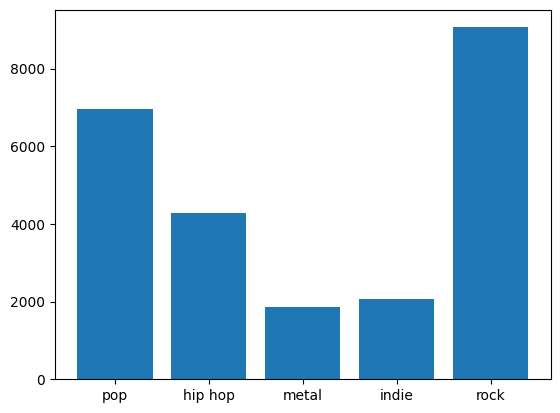

In [37]:
plts.bar(labels,counts)